<a href="https://colab.research.google.com/github/PremGorecki/DataScience/blob/main/06_uczenie_maszynowe/07_k_najblizszych_sasiadow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [ ]:
from sklearn.datasets import load_iris # kosieciec
raw_data = load_iris()
#print(raw_data.data)
print(raw_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(raw_data.target)

Teraz robimy data frame'y


In [ ]:
df1 = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
df2 = pd.DataFrame(data=raw_data.target, columns=['class'])
df = pd.concat([df1, df2], axis=1)  # łączy w jeden obiekt data frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Wykres Rozproszenia

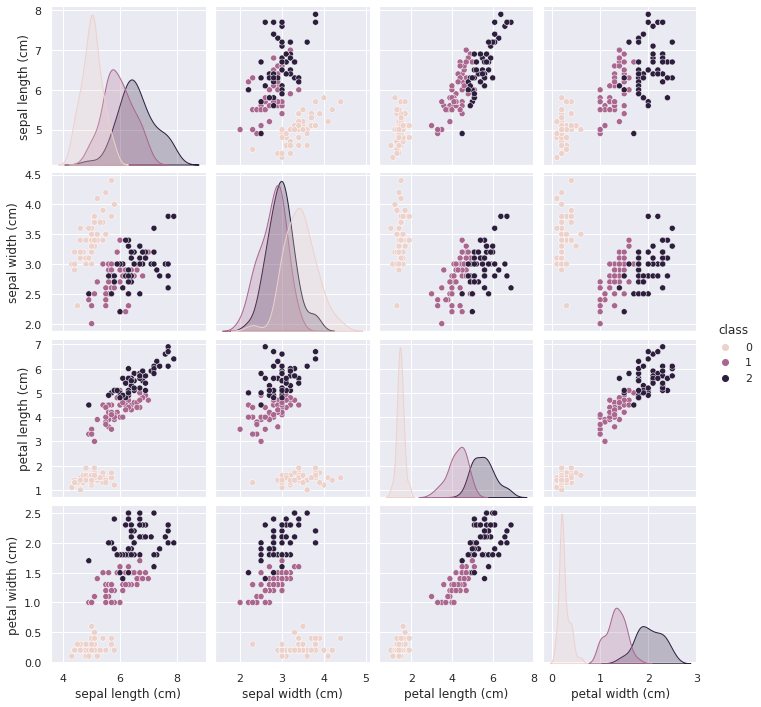

In [ ]:
_ = sns.pairplot(df, hue='class')
# robimy wykres rozproszenia i sprawdzamy który z którym da się rozdzielić

In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
X = raw_data.data
y = raw_data.target
X = X[:, :2] # bierzemy sepal legth i width bo te dwie pozostałe są mocno skorelowane


print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 2)
y shape: (150,)


Nie dzielimy na dane testowe i treningowe bo danych nie jest dużo

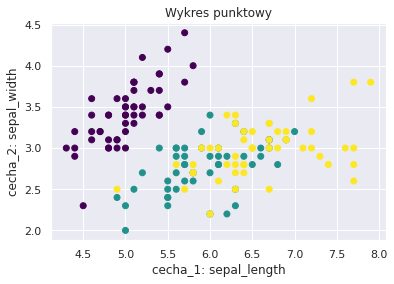

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Wykres punktowy')
plt.xlabel('cecha_1: sepal_length')
plt.ylabel('cecha_2: sepal_width')
plt.show()

In [ ]:
df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])
target = pd.DataFrame(y, columns=['class'])
df = pd.concat([df, target], axis=1)
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=600, height=400)

K-nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X, y)

KNeighborsClassifier()

In [ ]:
# Liczymy dokłdadność na naszym modelu

accuracy = classifier.score(X, y)
accuracy

0.84

Wykres granic decyzyjnych

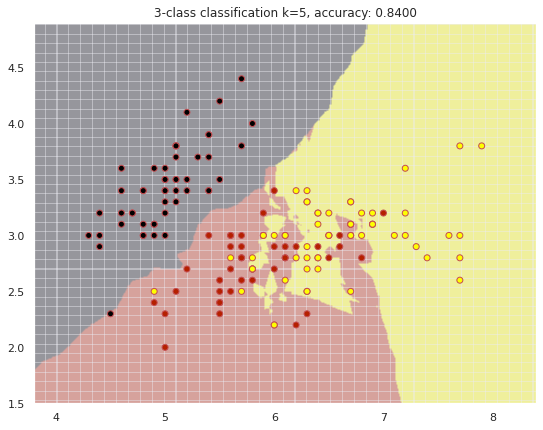

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k=5, accuracy: {accuracy:.4f}')
plt.show()

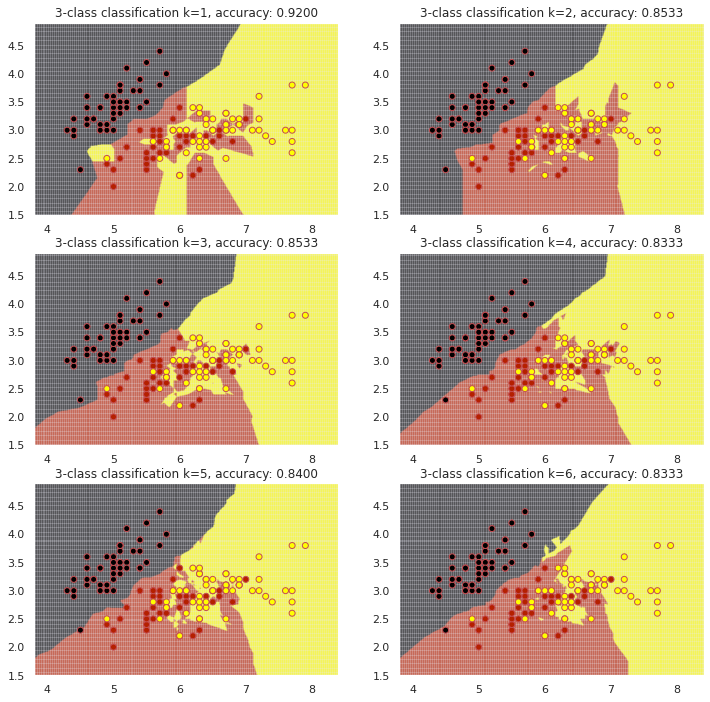

In [ ]:
# Teraz robimy pętle która nam sprawdza jak to się rozkłada w zależności od liczby sąsiadów
plt.figure(figsize=(12, 12))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X, y)
    accuracy = classifier.score(X, y)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}, accuracy: {accuracy:.4f}')
plt.show()

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': range(2, 30)} # siatka parametów jako słownik u nas akurat jeden parametr

classifier = KNeighborsClassifier()

gs = GridSearchCV(classifier, grid_params, cv=3)
# cv=3 crossed validatation podzieli nasze dane na 3 równe części i co robi
# bierze część 1 i 2 trenuje i sprawdza n 3 potem bierzez 1 i 3 i sprawdza na 2 itd

gs.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)})

In [ ]:
# teraz wyświetlamy najlepsze wartości parametrów

gs.best_params_

{'n_neighbors': 6}

In [ ]:
k = gs.best_params_['n_neighbors']
k

6

In [ ]:
classifier = gs.best_estimator_
classifier

KNeighborsClassifier(n_neighbors=6)